# 📌 Projet : Prédiction de souscription à un dépôt bancaire


## 📊 Choix du jeu de données

Dans le cadre de ce projet, plusieurs jeux de données étaient disponibles :

- `bank.csv` et `bank-full.csv` : versions issues de l’article de Moro et al. (2011), contenant 17 variables, sans contexte socio-économique.
- `bank-additional.csv` et `bank-additional-full.csv` : versions plus récentes, associées à l’article de Moro, Cortez & Rita (2014), intégrant des variables macro-économiques supplémentaires.

### ✅ Jeu de données utilisé : `bank-additional-full.csv`

Ce dataset contient **41 188 observations** et **20 variables explicatives** + 1 variable cible (`y`). Il est enrichi de données économiques telles que :
- `emp.var.rate` : taux de variation de l'emploi
- `euribor3m` : taux Euribor à 3 mois
- `nr.employed` : nombre d’employés

### 🎯 Raisons de ce choix

| Critère                  | Justification |
|--------------------------|---------------|
| **Pertinence scientifique** | Ce jeu est utilisé dans l’article de référence [Moro et al., 2014], mentionné dans l’énoncé du projet. |
| **Richesse des données**    | Présence de variables socio-économiques qui améliorent la qualité prédictive des modèles. |
| **Taille suffisante**       | Permet un apprentissage fiable pour des modèles comme KNN ou arbre de décision. |
| **Fiabilité**               | Jeu de données bien documenté, sans valeurs manquantes, avec un format structuré. |

> 🔍 *Conclusion :* ce dataset est le plus adapté pour répondre à l’objectif du projet, à savoir prédire de manière réaliste si un client souscrit à un dépôt à terme à partir des données issues de campagnes de télémarketing.



##  Description des variables (bank-additional-full.csv)

| Variable           | Description courte                   |
|--------------------|---------------------------------------|
| **age**            | Âge du client                         |
| **job**            | Métier du client                      |
| **marital**        | Situation matrimoniale                |
| **education**      | Niveau d’éducation                    |
| **default**        | Crédit en défaut                      |
| **housing**        | Prêt immobilier                       |
| **loan**           | Prêt personnel                        |
| **contact**        | Type de contact                       |
| **month**          | Mois du dernier contact               |
| **day_of_week**    | Jour du dernier contact               |
| **duration**       | Durée de l’appel (en secondes)        |
| **campaign**       | Nb d'appels durant la campagne        |
| **pdays**          | Jours depuis dernier contact          |
| **previous**       | Nb d’anciens contacts                 |
| **poutcome**       | Résultat de la campagne précédente    |
| **emp.var.rate**   | Variation taux d'emploi (éco)         |
| **cons.price.idx** | Indice des prix (conso)               |
| **cons.conf.idx**  | Indice de confiance (conso)           |
| **euribor3m**      | Taux Euribor 3 mois                   |
| **nr.employed**    | Nombre de salariés (éco)              |
| **y**              | Souscription dépôt à terme (cible)    |


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score





## 1. Charegement et aperçu des données

### 1.1 Charger les données :

In [69]:
df1 = pd.read_csv("bank-additional-full.csv", sep=";")
df = df1.copy()

### 1.2 Aperçu

In [70]:
print("Dimentions du dataset: ", df.shape)
df.info()
df.head()

Dimentions du dataset:  (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##  2. Vérification des valeurs 
### 2.1 Compter les "unknown" dans chaque colonne

In [71]:
unknown_counts = (df == 'unknown').sum()
print(unknown_counts[unknown_counts > 0])


job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


- `job`, `marital`, `housing`, `loan`, `education` → contiennent un faible pourcentage de `"unknown"` (≲ 5%) → **conservés et traités comme une modalité normale**
- `default` → contient plus de 20% de `"unknown"`, ce qui est significatif.



### 2.2 Vérification des doublons:

In [72]:
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons : {nb_doublons}")


Nombre de doublons : 12


- On remarque que on a 12 doublants donc on va les traites par les supprimes

- Suppression des doublants 

In [73]:
df = df.drop_duplicates()

### 2.3- Détection d'outliers simples

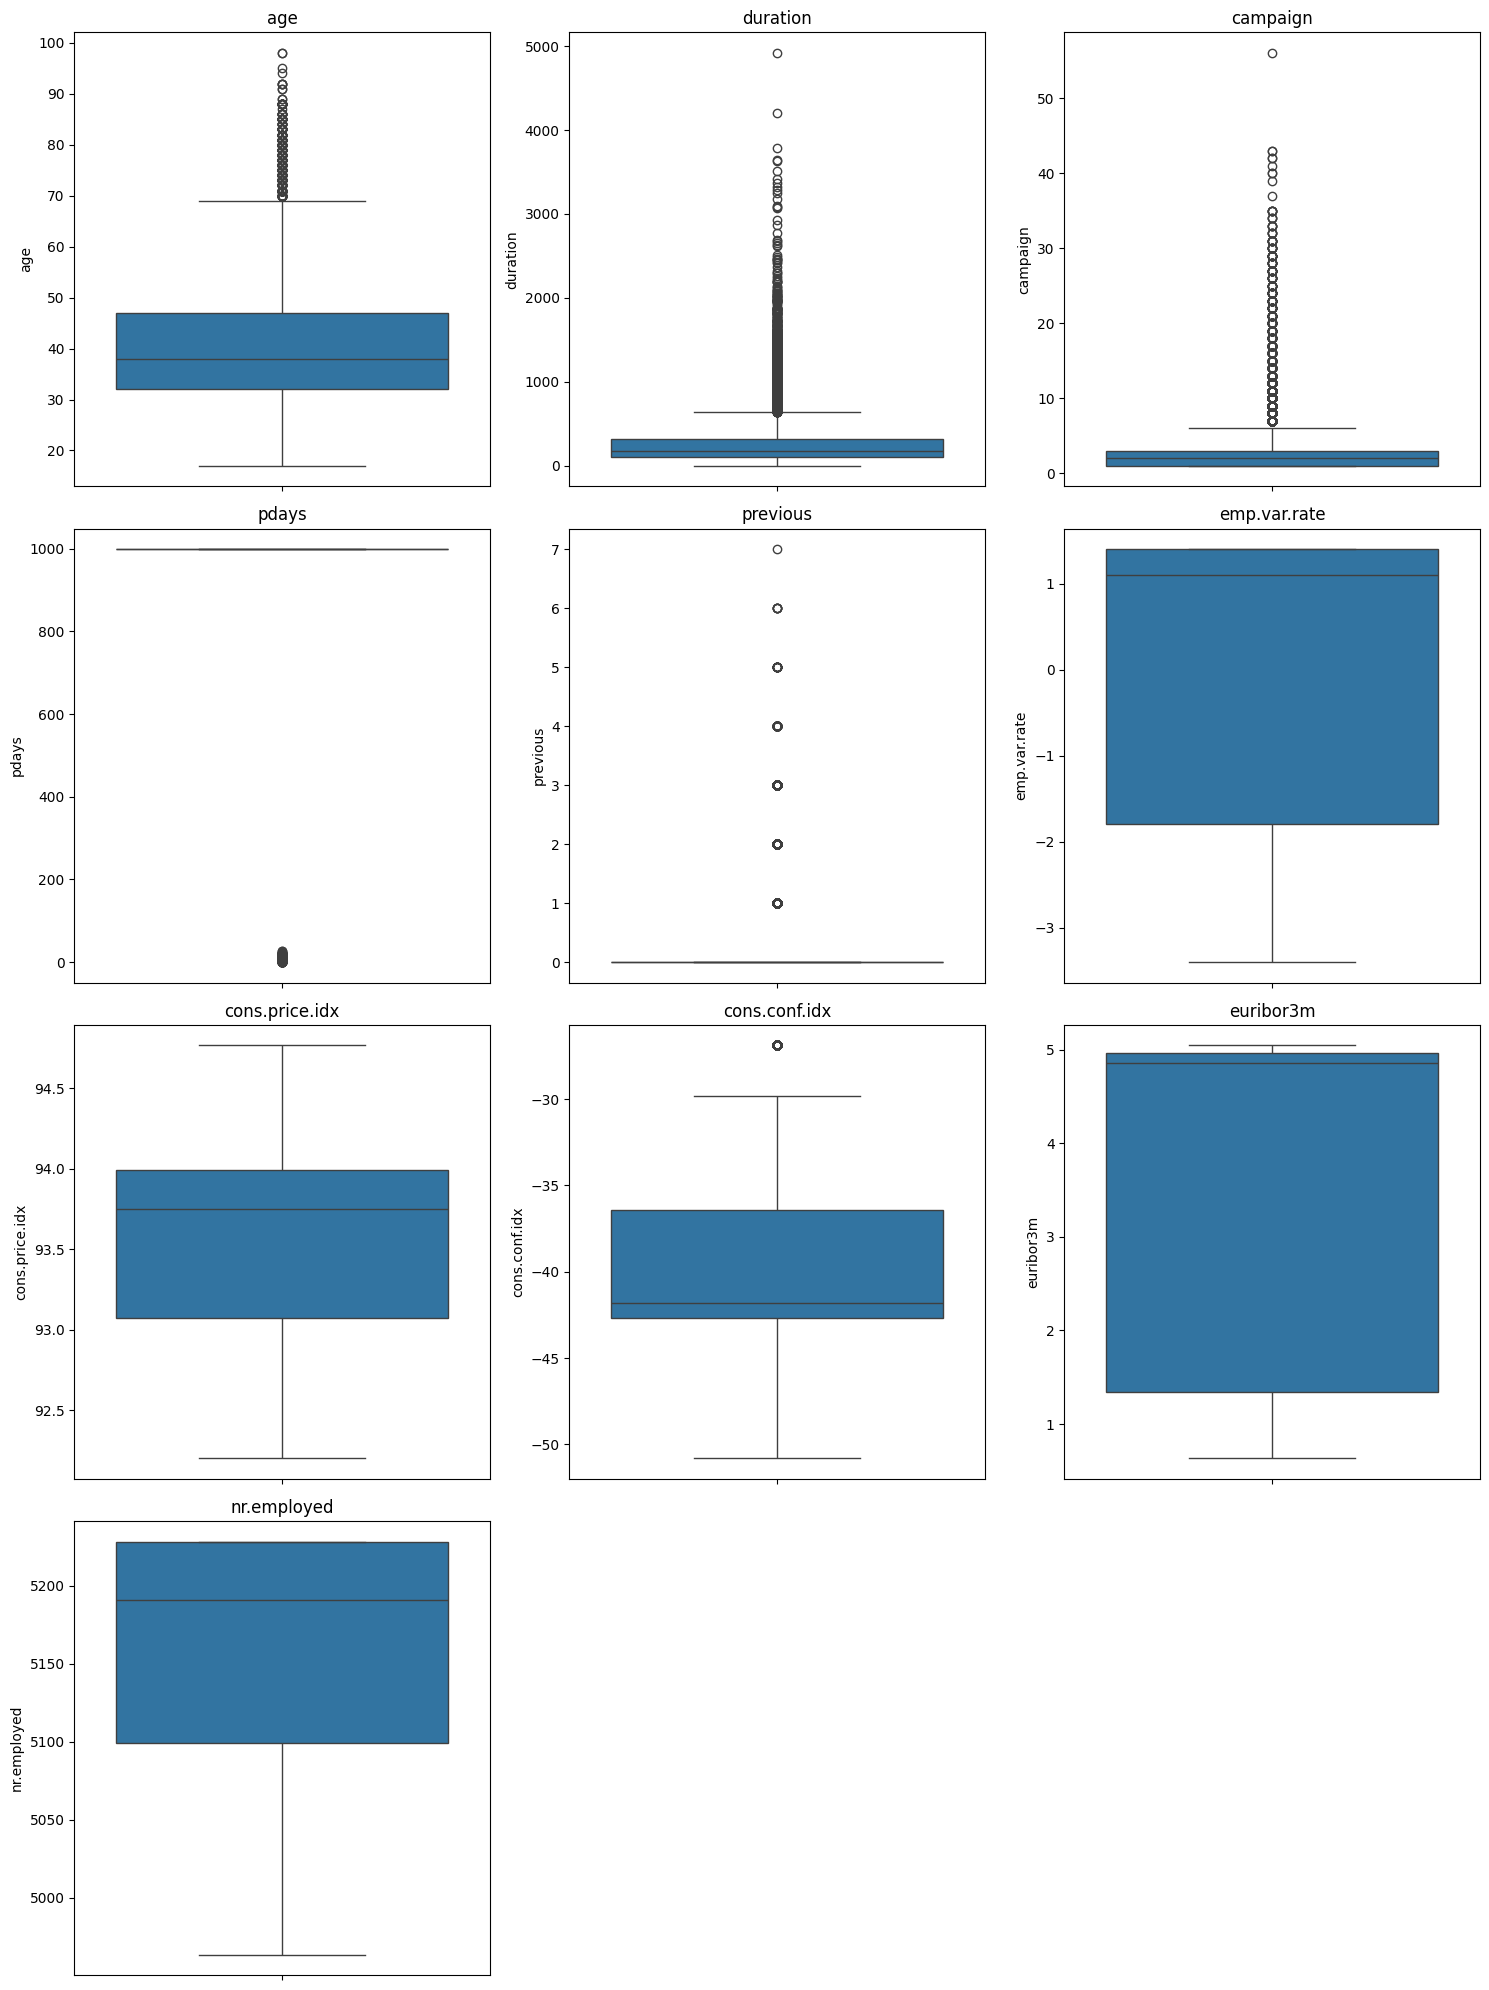

In [74]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(num_cols)
plt.figure(figsize=(15, 5 * ((n // 3) + 1)))
for i, col in enumerate(num_cols):
    plt.subplot((n // 3) + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- Les variables campaign et previous affichent également une distribution asymétrique, avec une concentration très forte autour de petites valeurs et quelques extrêmes. Elles peuvent être transformées (log) ou gardées telles quelles selon le modèle

- La variable pdays montre une valeur très élevée (999) utilisée pour signifier qu’un client n’a jamais été contacté auparavant. Cette codification est difficile à interpréter directement ; une version binaire (ex. was_contacted) est préférable.

- Les variables économiques euribor3m, emp.var.rate et nr.employed sont concentrées mais redondantes. On gardera la plus interprétable (euribor3m) pour éviter la multicolinéarité

In [75]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('y', errors='ignore')

print("\nVariables avec outliers potentiels (Z-score > 3) :")
outlier_counts = {}
for col in numerical_cols:
    z = zscore(df[col])
    outliers = (abs(z) > 3).sum()
    if outliers > 0:
        outlier_counts[col] = outliers
        print(f"{col} : {outliers} valeurs extrêmes ({outliers / len(df) * 100:.2f}%)")


Variables avec outliers potentiels (Z-score > 3) :
age : 369 valeurs extrêmes (0.90%)
duration : 861 valeurs extrêmes (2.09%)
campaign : 869 valeurs extrêmes (2.11%)
pdays : 1515 valeurs extrêmes (3.68%)
previous : 1064 valeurs extrêmes (2.58%)


In [76]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col} : {df[col].unique()}")

print("\nDistribution de y :")
print(df['y'].value_counts(normalize=True))


job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital : ['married' 'single' 'divorced' 'unknown']

education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default : ['no' 'unknown' 'yes']

housing : ['no' 'yes' 'unknown']

loan : ['no' 'yes' 'unknown']

contact : ['telephone' 'cellular']

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome : ['nonexistent' 'failure' 'success']

y : ['no' 'yes']

Distribution de y :
y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


## 3. Analyse de la variable cible 'y' et des autres variables en relation 
### 3.1 Distribution de y

In [77]:
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True) * 100)

y
no     36537
yes     4639
Name: count, dtype: int64
y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64


#### 3.2 Affichage de la Répartition de la variable cible (y):


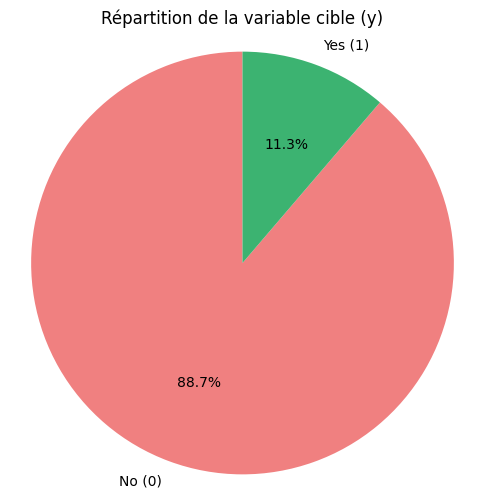

In [78]:
labels = ['No (0)', 'Yes (1)']
sizes = df['y'].value_counts(normalize=True) * 100
colors = ['lightcoral', 'mediumseagreen']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Répartition de la variable cible (y)")
plt.axis('equal')
plt.show()

#### remarque : 
- La grande majorité des clients ont répondu **"no"**
- Seule une **petite proportion** (~11%) a souscrit à l’offre
- Vu que les  yes sont beaucoup plus faible que les non ce resultat faut le prendre en compte et faire car si on entraine un modèle de classification sans faire on aura un modèle qui pourrait tout prèdire en non 

### affichage des differente ages qu'on a : 

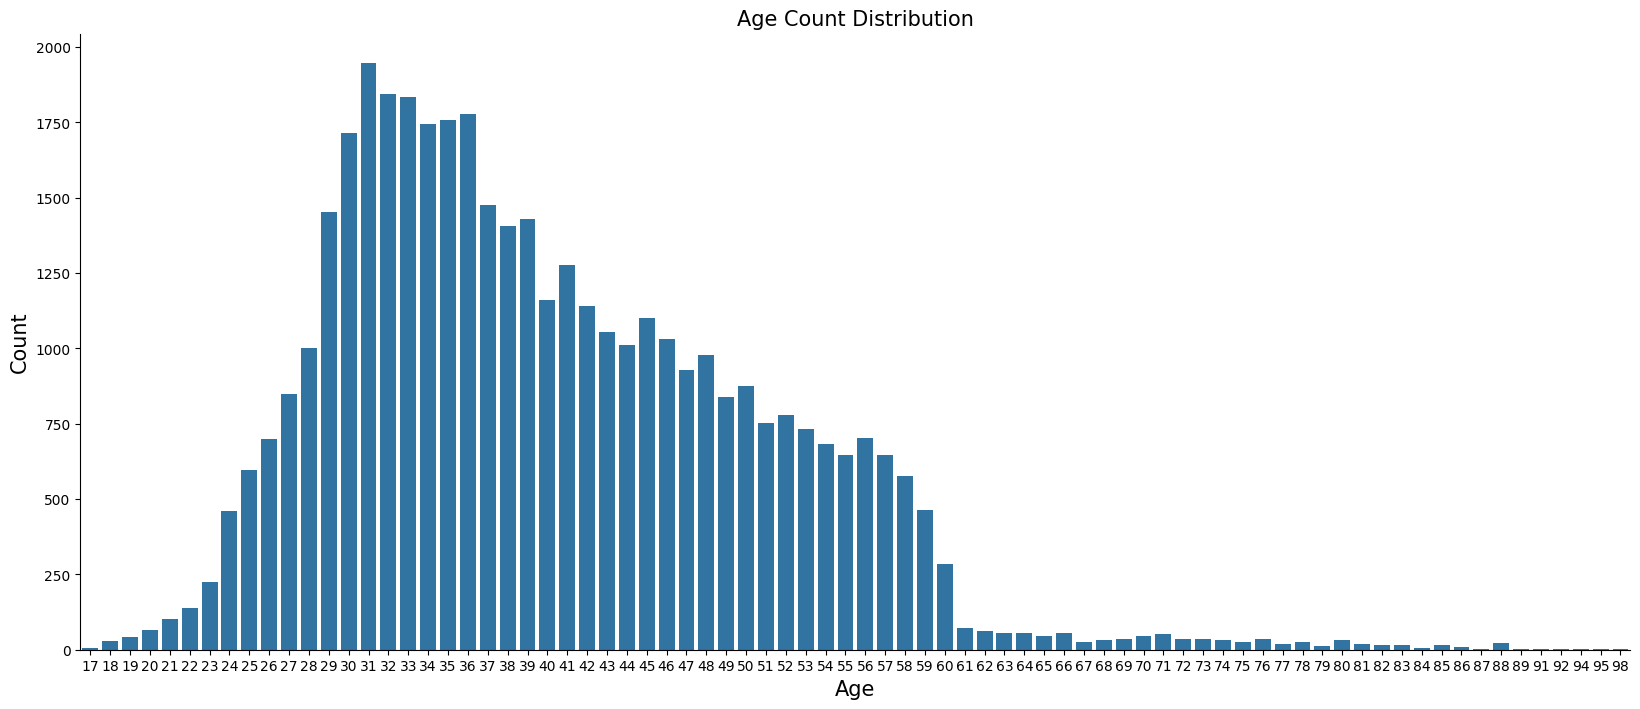

In [79]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

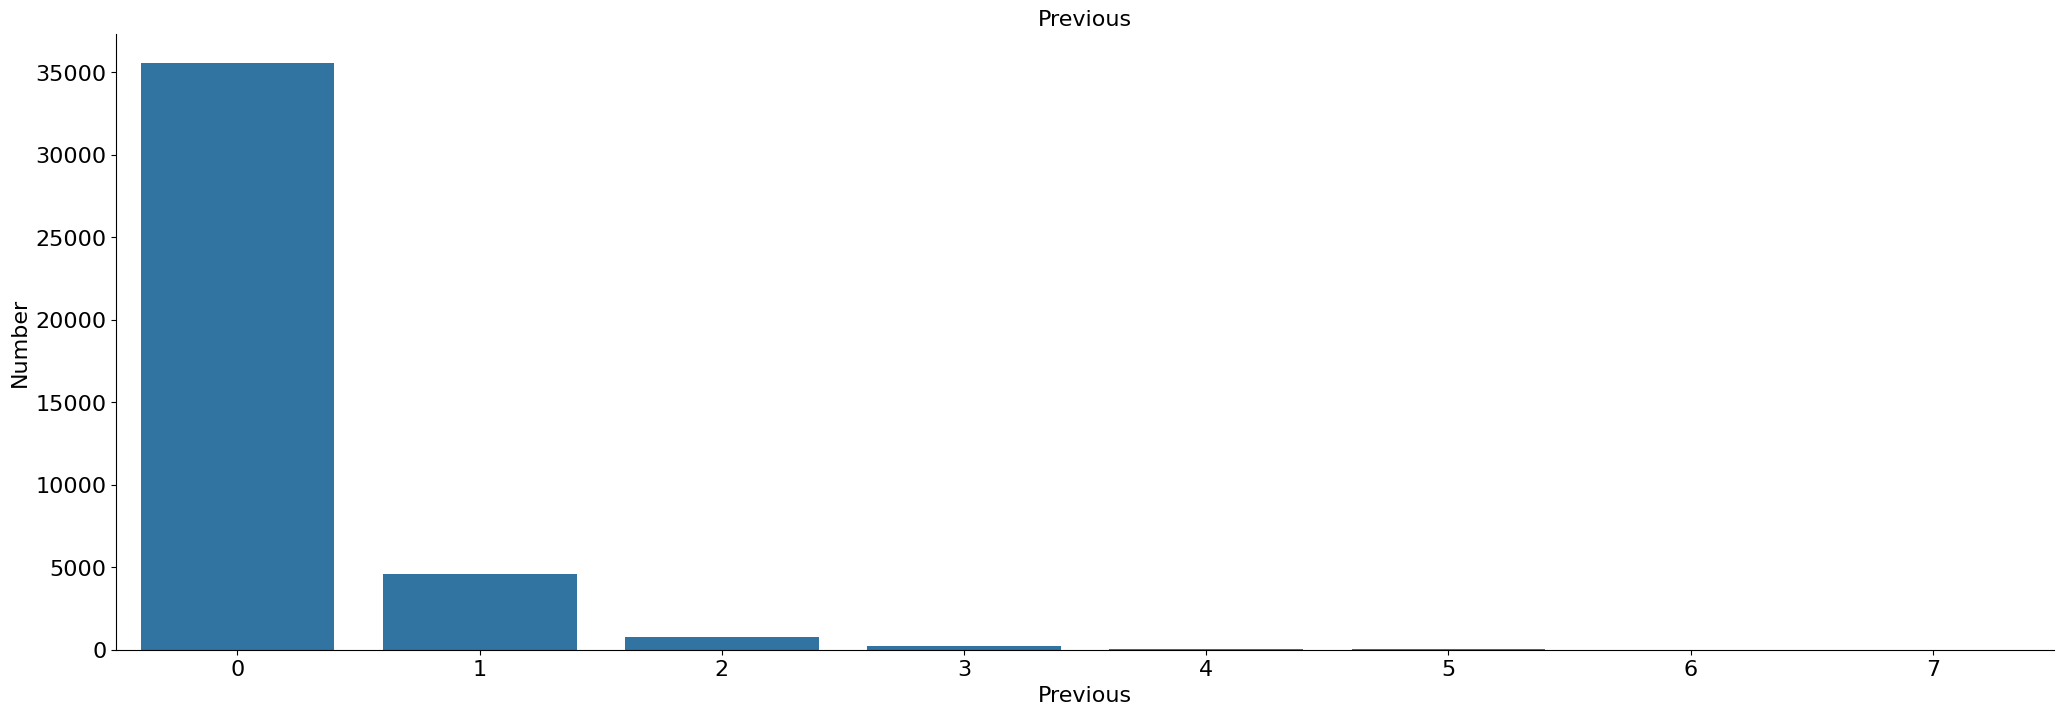

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

## 4- Transforamtion des données: 

- D'apres le remarque visuelle on a vu que les données on une grande echelle donc vaut mieux transformer ces données Rendre la distribution plus régulière, plus proche d’une forme normale pour que ça devient facile pour le modele d'apprendre

In [81]:
df['duration_log'] = np.log1p(df['duration'])
df['campaign_log'] = np.log1p(df['campaign'])
df['pdays_log'] = np.log1p(df['pdays'])
df['previous_log'] = np.log1p(df['previous'])

In [82]:

df['y'] = df['y'].map({'no': 0, 'yes': 1}) #encodage de la variable cible 

## 5- Encodage (One-Hot Encoding).

In [83]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)

cols_new_cat = cols_new_cat.astype(int)
cols_new_cat.head()




,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


-  Maintenat qu'on a encodé les variables catégorielles on va supprimer de la data frame et on va fusionner les tableau encoder et l'ancien tableau 

In [84]:
df = df.drop(columns=cols_cat)
df = pd.concat([df, cols_new_cat], axis=1)
print("Dimensions finales du DataFrame :", df.shape)
print(df.head())

Dimensions finales du DataFrame : (41176, 68)
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_oct  month_sep  \
0          -36.4      4.857       5191.0  ...          0          0   
1          -36.4      4.857       5191.0  ...          0          0   
2          -36.4      4.857       5191.0  ...          0          0   
3          -36.4      4.857       5191.0  ...          0          0   
4          -36.4      4.857       5191.0  ...          0          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_wee

## 6. Normalisation :

- Pour la normalisation on va utiliser MinMAxScaler :

In [85]:
from sklearn.preprocessing import MinMaxScaler  

cols_to_scale = [col for col in df.columns if df[col].nunique() > 2 and col != 'y']

scaler = MinMaxScaler()


df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


print("Statistiques après normalisation :")
print(df[cols_to_scale].describe().T)


Statistiques après normalisation :
                  count      mean       std  min       25%       50%  \
age             41176.0  0.284244  0.128650  0.0  0.185185  0.259259   
duration        41176.0  0.052525  0.052726  0.0  0.020740  0.036600   
campaign        41176.0  0.028507  0.050369  0.0  0.000000  0.018182   
pdays           41176.0  0.963428  0.187124  0.0  1.000000  1.000000   
previous        41176.0  0.024716  0.070709  0.0  0.000000  0.000000   
emp.var.rate    41176.0  0.725400  0.327267  0.0  0.333333  0.937500   
cons.price.idx  41176.0  0.535744  0.225580  0.0  0.340608  0.603274   
cons.conf.idx   41176.0  0.430843  0.193634  0.0  0.338912  0.376569   
euribor3m       41176.0  0.677237  0.393207  0.0  0.160961  0.957379   
nr.employed     41176.0  0.769130  0.273162  0.0  0.512287  0.859735   
duration_log    41176.0  0.608543  0.107869  0.0  0.545207  0.611526   
campaign_log    41176.0  0.127141  0.146700  0.0  0.000000  0.121038   
pdays_log       41176.0  0.97

## 7.Détection des corrélation 

<Figure size 1800x1600 with 0 Axes>

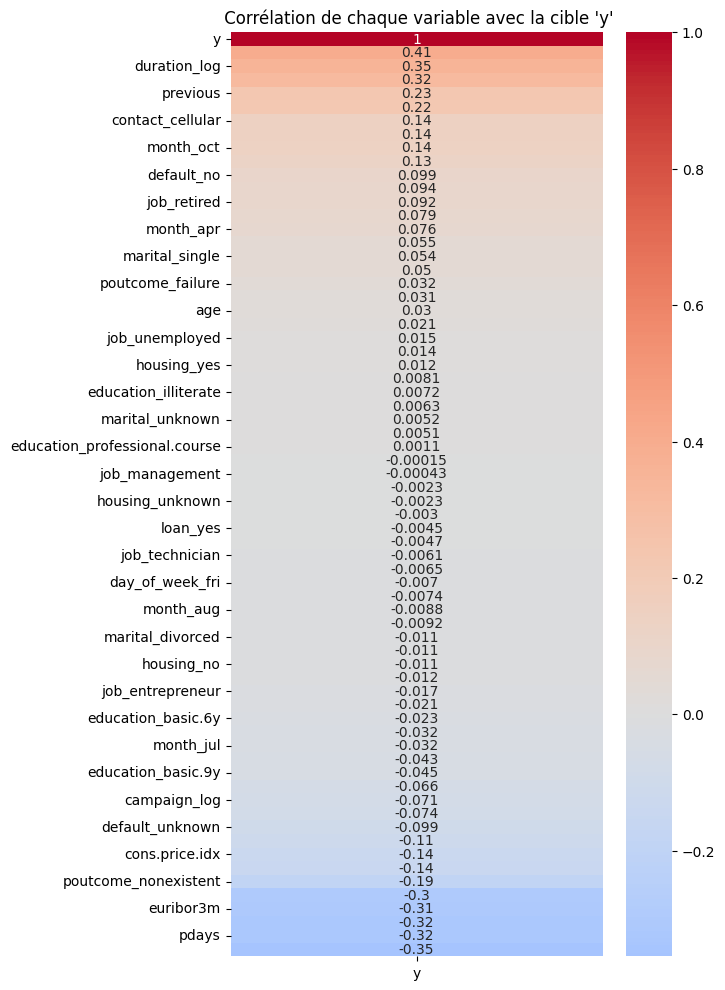

In [86]:

plt.figure(figsize=(18, 16))
corr_matrix_full = df.corr()


plt.figure(figsize=(6, 12))
sns.heatmap(corr_matrix_full[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title(" Corrélation de chaque variable avec la cible 'y'")
plt.show()



In [87]:

corr_matrix = df.corr()
correlation_with_y = corr_matrix['y'].sort_values(ascending=False)
print("Corrélation avec y (ordre décroissant) :")
print(correlation_with_y)

selected_features = correlation_with_y[abs(correlation_with_y) >= 0.15].index.tolist()

if 'y' in selected_features:
    selected_features.remove('y')  



Corrélation avec y (ordre décroissant) :
y                   1.000000
duration            0.405297
duration_log        0.351016
poutcome_success    0.316302
previous            0.230202
                      ...   
emp.var.rate       -0.298289
euribor3m          -0.307740
pdays_log          -0.323716
pdays              -0.324948
nr.employed        -0.354669
Name: y, Length: 68, dtype: float64


### 7.1 suppression des variables à faiible corrélation 

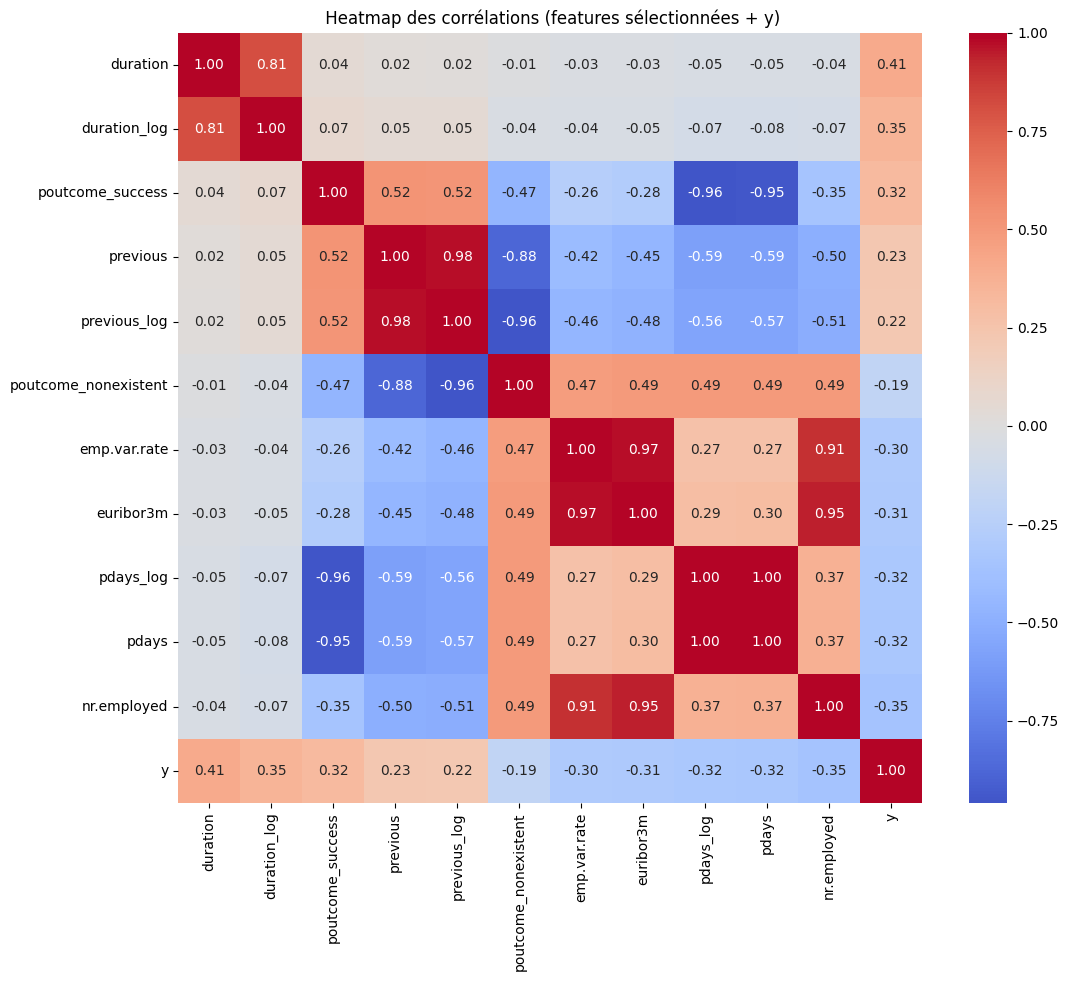

In [88]:

heatmap_data = df[selected_features + ['y']]

corr_matrix = heatmap_data.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title(" Heatmap des corrélations (features sélectionnées + y)")
plt.show()


### 7.4 suppression des varaibles à forte correlation 


In [89]:
# Affiche les couples de variables avec une corrélation > 0.9 (sauf avec elles-mêmes)
corr_matrix = df.corr().abs()
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
             .stack()
             .sort_values(ascending=False))
print("Paires de variables fortement corrélées (> 0.9) :")
print(high_corr[high_corr > 0.9])


Paires de variables fortement corrélées (> 0.9) :
contact_cellular  contact_telephone       1.000000
housing_unknown   loan_unknown            1.000000
default_no        default_unknown         0.999780
pdays             pdays_log               0.995077
previous          previous_log            0.976339
emp.var.rate      euribor3m               0.972244
previous_log      poutcome_nonexistent    0.959024
pdays_log         poutcome_success        0.955628
housing_no        housing_yes             0.952805
pdays             poutcome_success        0.950700
euribor3m         nr.employed             0.945146
loan_no           loan_yes                0.915836
emp.var.rate      nr.employed             0.906949
campaign          campaign_log            0.900622
dtype: float64


In [90]:
cols_to_drop = [
    'pdays', 'previous', 'campaign',
    'loan_no',  # ou 'loan_yes'
    'housing_no',  # ou 'housing_yes'
    'default_no',  # ou 'default_unknown'
    'housing_unknown',  # ou 'loan_unknown'
    'contact_telephone',  # ou 'contact_cellular'
    'poutcome_nonexistent',
    'pdays_log'
]

df = df.drop(columns=cols_to_drop)
print("Vérification  :", df.shape)


Vérification  : (41176, 58)


/home/dxter/Bank Marketing/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


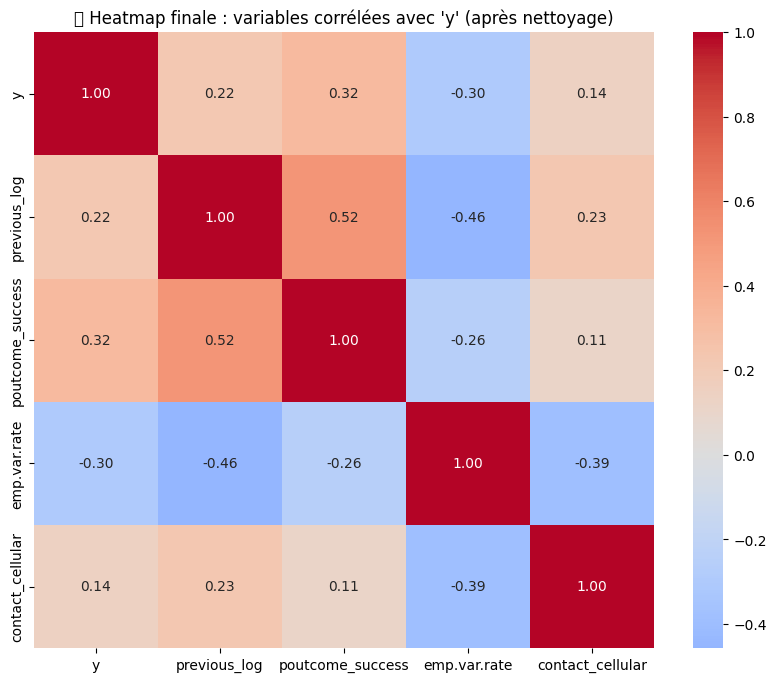

In [91]:

corr_matrix = df.corr()
correlation_with_y = corr_matrix['y'].abs().sort_values(ascending=False)


cols_focus = ['y', 'previous_log', 'poutcome_success', 'emp.var.rate', 'contact_cellular']  


# Affichage
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_focus].corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("🔍 Heatmap finale : variables corrélées avec 'y' (après nettoyage)")
plt.show()


## 8.Modélisation (TRAINNIG, VALIDATION, TEST SAMPLES)

### 8.1- Desicion Tree 

- Séparons nos données maintenant 

In [92]:
X = df.drop(columns=["y"])  
y = df["y"]  


print("X shape :", X.shape)
print("y shape :", y.shape)
print("Répartition de y :\n", y.value_counts(normalize=True))


X shape : (41176, 57)
y shape : (41176,)
Répartition de y :
 y
0    0.887337
1    0.112663
Name: proportion, dtype: float64


- D'apres ces resultats on peut remarque facilment que y'a un desiquilibre entre les clients sont souscrit 11 % et 88% des clients n'ont pas sousrit 
- X est  la variable explicatives (tout les autres varaibale qu'on a essayé d'affiner et qu'on pretraité)
- Y nottre variable cible ce qu'on essaye de predire 

In [93]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)


print("Après SMOTE :")
print("X_resampled shape :", X_resampled.shape)
print("y_resampled distribution :\n", y_resampled.value_counts(normalize=True))


Après SMOTE :
X_resampled shape : (73074, 57)
y_resampled distribution :
 y
0    0.5
1    0.5
Name: proportion, dtype: float64


- Vu qu'on a trouver que les variables ne sont pas equilibrer donc apres des recherches j'ai trouver une methode pour reequilibrer les variables 
- Smote( sythetic minority over sampling technique) est une technique utilisée pour équilibrer un data set générant des exemples synthétiques de la classe minoritaire ici dans notre situation les clients qui s"ont dis oui

In [94]:
from sklearn.model_selection import train_test_split

# Séparation du jeu de données équilibré
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,  # pour garder la proportion 50/50 dans chaque partie
    random_state=42
)

# Vérification
print(" Jeux de données prêts :")
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.value_counts(normalize=True))
print("y_test  :", y_test.value_counts(normalize=True))


 Jeux de données prêts :
X_train : (58459, 57)
X_test  : (14615, 57)
y_train : y
1    0.500009
0    0.499991
Name: proportion, dtype: float64
y_test  : y
0    0.500034
1    0.499966
Name: proportion, dtype: float64


In [95]:
# Modèle avec les meilleurs paramètres
from sklearn.tree import DecisionTreeClassifier


best_tree = DecisionTreeClassifier(
    class_weight=None,   
    max_depth=None,      
    min_samples_split=2, 
    min_samples_leaf=1,  
    random_state=42
)

# Entraînement du modèle
best_tree.fit(X_train, y_train)

# Prédictions
y_pred_best_tree = best_tree.predict(X_test)

# Évaluation
print(" Arbre de décision avec meilleurs paramètres")
print(classification_report(y_test, y_pred_best_tree))
roc_auc_best = roc_auc_score(y_test, best_tree.predict_proba(X_test)[:, 1])
print("AUC-ROC Score avec meilleurs paramètres :", roc_auc_best)


 Arbre de décision avec meilleurs paramètres
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7308
           1       0.92      0.93      0.92      7307

    accuracy                           0.92     14615
   macro avg       0.92      0.92      0.92     14615
weighted avg       0.92      0.92      0.92     14615

AUC-ROC Score avec meilleurs paramètres : 0.9219983683010399


### 8.2- KNN (K-Nearset Neighbors)

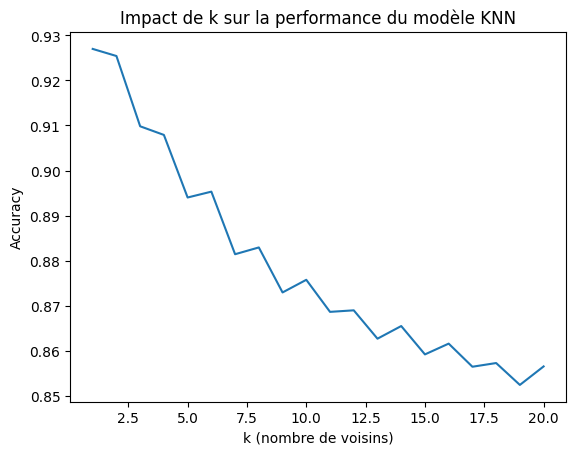

In [96]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Essayer différentes valeurs de k
k_range = range(1, 21)  # Tester de k=1 à k=20
scores = []

# Test de chaque valeur de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy = classification_report(y_test, y_pred_knn, output_dict=True)['accuracy']
    scores.append(accuracy)

# Visualiser l'impact de k sur la performance
plt.plot(k_range, scores)
plt.xlabel('k (nombre de voisins)')
plt.ylabel('Accuracy')
plt.title('Impact de k sur la performance du modèle KNN')
plt.show()


- On remarque que d'apres ce graphe que le choix de K influence sur la precission du modèle donc le choix le plus optimal tout en gardant un nombre de voisin modèrer et une precission optimale est 4 

In [97]:

knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski')


knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN - Rapport de classification :")
print(classification_report(y_test, y_pred_knn))
# Calcul de l'AUC-ROC
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print("KNN - AUC-ROC Score :", roc_auc_knn)


KNN - Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      7308
           1       0.89      0.93      0.91      7307

    accuracy                           0.91     14615
   macro avg       0.91      0.91      0.91     14615
weighted avg       0.91      0.91      0.91     14615

KNN - AUC-ROC Score : 0.9520743861615628


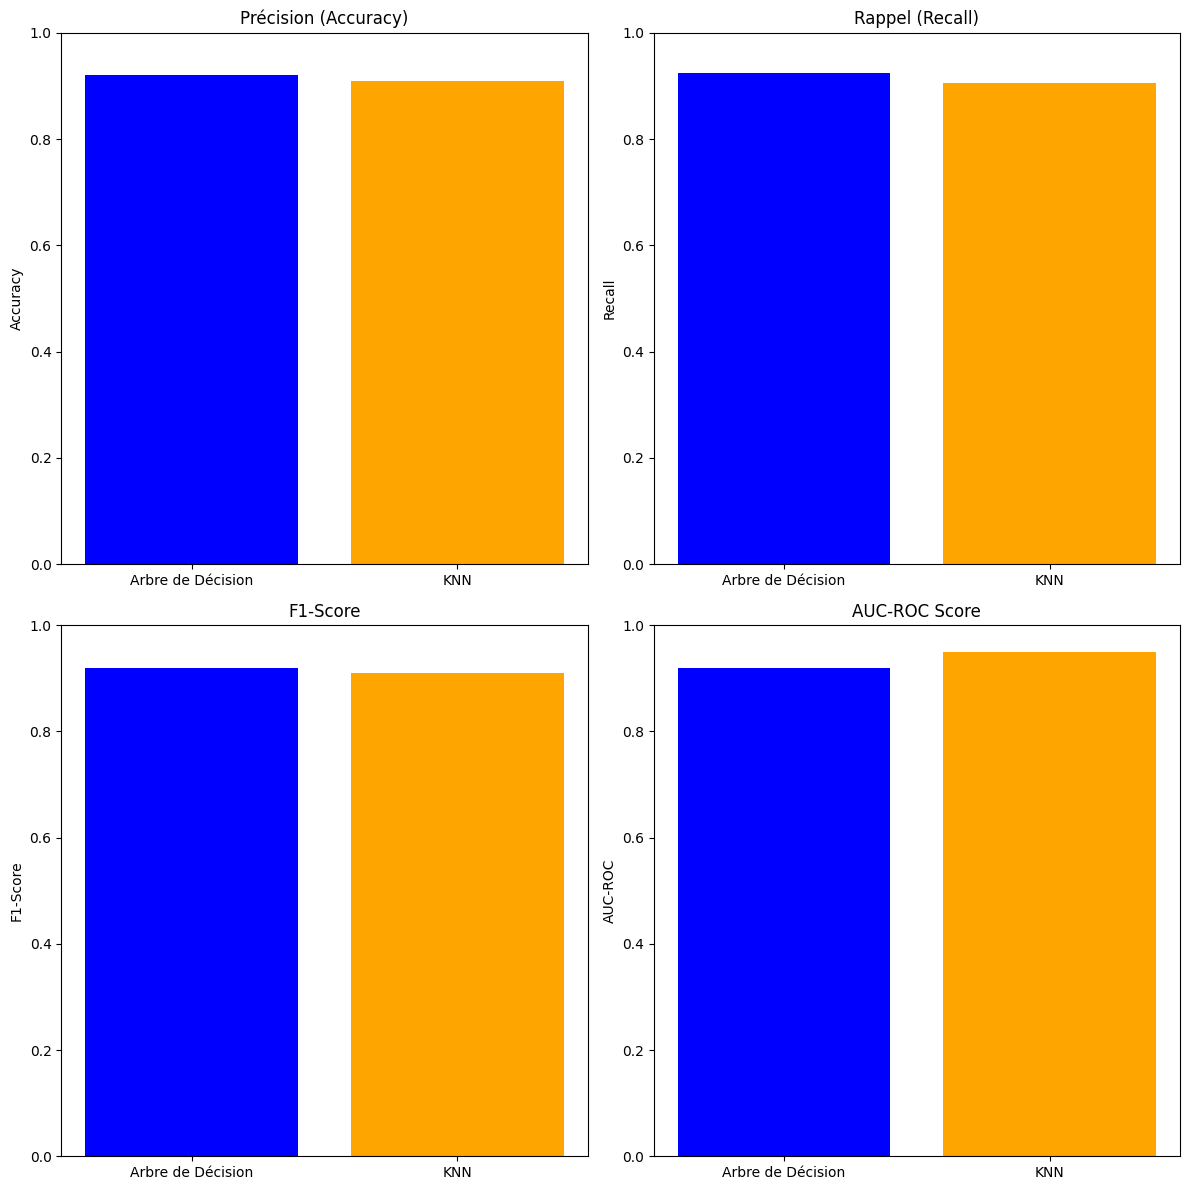

In [98]:

accuracy_tree = 0.92
precision_tree = [0.93, 0.92]  
recall_tree = [0.92, 0.93]     
f1_tree = [0.92, 0.92]         
roc_auc_tree = 0.92

accuracy_knn = 0.91
precision_knn = [0.93, 0.89]  
recall_knn = [0.88, 0.93]      
f1_knn = [0.91, 0.91]          
roc_auc_knn = 0.95


models = ['Arbre de Décision', 'KNN']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Comparaison de l'accuracy
axes[0, 0].bar(models, [accuracy_tree, accuracy_knn], color=['blue', 'orange'])
axes[0, 0].set_title('Précision (Accuracy)')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel('Accuracy')

# Comparaison du rappel
axes[0, 1].bar(models, [np.mean(recall_tree), np.mean(recall_knn)], color=['blue', 'orange'])
axes[0, 1].set_title('Rappel (Recall)')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_ylabel('Recall')

# Comparaison du F1-score
axes[1, 0].bar(models, [np.mean(f1_tree), np.mean(f1_knn)], color=['blue', 'orange'])
axes[1, 0].set_title('F1-Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_ylabel('F1-Score')

# Comparaison de l'AUC-ROC
axes[1, 1].bar(models, [roc_auc_tree, roc_auc_knn], color=['blue', 'orange'])
axes[1, 1].set_title('AUC-ROC Score')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_ylabel('AUC-ROC')

# Affichage des graphiques
plt.tight_layout()
plt.show()


- On remarque d'apres c'est graphe que les resultats de la prediction sont assez proche et que les deux modèle donnent des resultat optimal 

### 8.3- Random Forest avec GridSearchCV:

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# 1. Modèle de base
rf = RandomForestClassifier(random_state=42)

# 2. Dictionnaire des hyperparamètres à tester
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'class_weight': ['balanced']
}

# 3. Recherche avec GridSearchCV (ça tournera très vite ici)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3,
                           n_jobs=-1, verbose=2, scoring='accuracy')

# 4. Entraînement
grid_search.fit(X_train, y_train)

# 5. Résultats
print("Meilleurs hyperparamètres :", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest - Rapport de classification :")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print("Random Forest - AUC-ROC Score :", roc_auc_rf)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.1s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.2s
Meilleurs hyperparamètres : {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      7308
           1       0.92      0.98      0.95      7307

    accuracy                           0.95     14615
   macro avg       0.95      0.95      0.95     14615
weighted avg       0.95      0.95      0.95     14615

Random Forest - AUC-ROC Score : 0.99128341067105

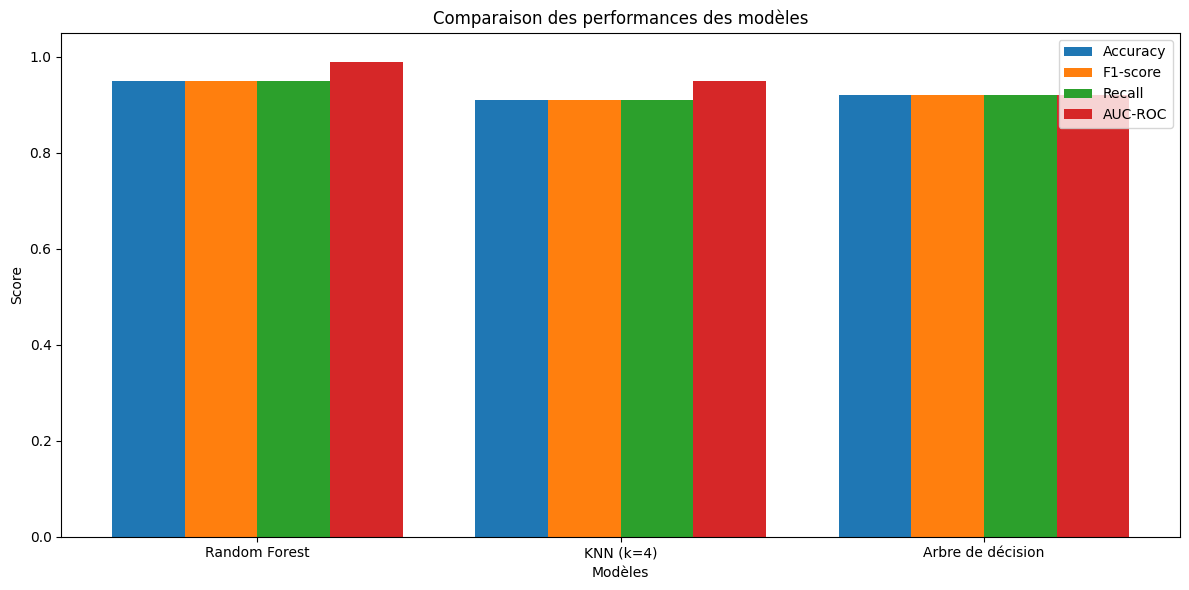

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Noms des modèles
models = ['Random Forest', 'KNN (k=4)', 'Arbre de décision']

# Résultats
accuracy = [0.95, 0.91, 0.92]
f1 = [0.95, 0.91, 0.92]
recall = [0.95, 0.91, 0.92]
roc_auc = [0.99, 0.95, 0.92]

# Organisation en tableau
scores = {
    'Accuracy': accuracy,
    'F1-score': f1,
    'Recall': recall,
    'AUC-ROC': roc_auc
}

# Création des graphes
x = np.arange(len(models))  # positions des barres
width = 0.2  # largeur des barres

fig, ax = plt.subplots(figsize=(12, 6))

# Dessiner les barres pour chaque métrique
for i, (metric, values) in enumerate(scores.items()):
    ax.bar(x + i * width, values, width, label=metric)

# Configurations
ax.set_xlabel('Modèles')
ax.set_ylabel('Score')
ax.set_title('Comparaison des performances des modèles')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.05)
ax.legend()
plt.tight_layout()
plt.show()
